<a href="https://colab.research.google.com/github/ldsAS/Tibame-AI-Learning/blob/main/Tibame0609_Recursive_feature_elimination_(RFE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recursive Feature Elimination (RFE) 與 Stepwise Selection 的比較
**Recursive Feature Elimination (RFE)** 和 **Stepwise Selection**（逐步選擇）方法在某些方面有相似之處，因為它們都用於選擇最合適的特徵，但它們的工作方式和具體實現有所不同。

## 主要區別：
1. **原理與過程**：
   - **Stepwise Selection（逐步選擇）**：
     - 基於統計模型的顯著性進行特徵選擇。
     - 包括：
       - **Forward Selection（前向選擇）**：從無變數開始，逐步添加最顯著的變數。
       - **Backward Elimination（後向刪除）**：從所有變數開始，逐步刪除不顯著的變數。
       - **Bidirectional Elimination（雙向刪除）**：結合前向選擇和後向刪除的過程。

   - **Recursive Feature Elimination (RFE)（遞歸特徵消除）**：
     - 基於模型的性能進行特徵選擇。
     - 步驟：
       1. 訓練模型並計算每個特徵的重要性（例如，回歸模型的係數或樹模型中的特徵重要性）。
       2. 遞歸地刪除最不重要的特徵，並再次訓練模型，直到選擇的特徵數量達到預定的目標。

2. **特徵選擇的方式**：
   - **Stepwise Selection** 依賴統計顯著性（例如 p 值）來選擇變數。
   - **RFE** 基於模型訓練後的特徵重要性來選擇變數。

3. **計算效率**：
   - **Stepwise Selection** 需要對每個步驟進行模型擬合，對於大量變數時可能會非常耗時。
   - **RFE** 通常基於特徵的重要性進行選擇，相對較為直接。

## 主要相似處：
- 兩者都是特徵選擇方法，旨在選擇對模型預測能力影響最大的變數。
- 都是逐步的過程，通常通過多次迭代來選擇最優的特徵集合。

## 總結：
雖然 **RFE** 和 **Stepwise Selection** 都是特徵選擇方法，並且都可以用於回歸模型中，但它們的選擇原理不同。**Stepwise** 方法依賴統計顯著性，而 **RFE** 則依賴模型的特徵重要性。因此，它們在處理特徵選擇問題時使用了不同的策略。


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("../data/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
x = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = data['Species']

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
estimator = SVC(kernel="linear")
selector = RFE(estimator, n_features_to_select=1)
selector = selector.fit(x, y)

In [ ]:
# 那些欄位被選擇
selector.support_

array([False, False,  True, False])

In [ ]:
# 欄位排除的順序
selector.ranking_

array([4, 3, 1, 2])

# 交叉驗證(CV) 版的 RFE

In [ ]:
from sklearn.feature_selection import RFECV
# from sklearn.svm import SVC
# estimator = SVC(kernel="linear")
from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier()
selector = RFECV(estimator, min_features_to_select=1, cv=5)
selector = selector.fit(x, y)

selector.feature_names_in_

array(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
      dtype=object)

In [ ]:
selector.support_

array([False, False,  True,  True])

In [ ]:
selector.ranking_

array([3, 2, 1, 1])

### RFECV會找尋最佳的欄位組合，因此不一定會收斂到min_features_to_select的數量

# 效果測試

In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv("../data/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
x = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = data['target']

## 不使用RFE

In [ ]:
from sklearn.model_selection import cross_val_score

# from sklearn.svm import SVC
# estimator = SVC(kernel="linear")

from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier()

cross_val_score(estimator, x, y, cv=3).mean()

np.float64(0.7260726072607261)

## 使用RFECV

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
# from sklearn.svm import SVC
# estimator = SVC(kernel="linear")

from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier()

selector = RFECV(estimator, min_features_to_select=5,cv=3)
selector = selector.fit(x, y)
selector.cv_results_

{'mean_test_score': array([0.67326733, 0.69636964, 0.70627063, 0.72277228, 0.72937294,
        0.72277228, 0.71617162, 0.72607261, 0.7359736 ]),
 'std_test_score': array([0.02800423, 0.03365689, 0.02598682, 0.03704611, 0.04596828,
        0.0323365 , 0.03645334, 0.03645334, 0.0406892 ]),
 'split0_test_score': array([0.65346535, 0.74257426, 0.74257426, 0.77227723, 0.79207921,
        0.76237624, 0.76237624, 0.77227723, 0.78217822]),
 'split1_test_score': array([0.71287129, 0.68316832, 0.68316832, 0.71287129, 0.71287129,
        0.72277228, 0.71287129, 0.72277228, 0.74257426]),
 'split2_test_score': array([0.65346535, 0.66336634, 0.69306931, 0.68316832, 0.68316832,
        0.68316832, 0.67326733, 0.68316832, 0.68316832]),
 'n_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13])}

In [ ]:
selector.feature_names_in_

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)

In [ ]:
selector.ranking_

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
estimator = SVC(kernel="linear")
selector = RFE(estimator, n_features_to_select=5)
selector = selector.fit(x, y)
selector.ranking_

array([8, 1, 2, 7, 9, 5, 4, 6, 1, 3, 1, 1, 1])

## 測試每一個不同數量的n_features_to_select

In [ ]:
n_list = np.arange(13,0,-1)
score = []
for n in n_list:
    estimator = SVC(kernel="linear")
    selector = RFE(estimator, n_features_to_select=n)
    score.append(cross_val_score(selector, x, y, cv=3).mean())
score

[np.float64(0.8382838283828383),
 np.float64(0.8448844884488449),
 np.float64(0.8415841584158416),
 np.float64(0.8283828382838284),
 np.float64(0.8217821782178217),
 np.float64(0.8184818481848185),
 np.float64(0.8316831683168316),
 np.float64(0.8052805280528054),
 np.float64(0.7689768976897691),
 np.float64(0.7491749174917492),
 np.float64(0.712871287128713),
 np.float64(0.7062706270627063),
 np.float64(0.702970297029703)]

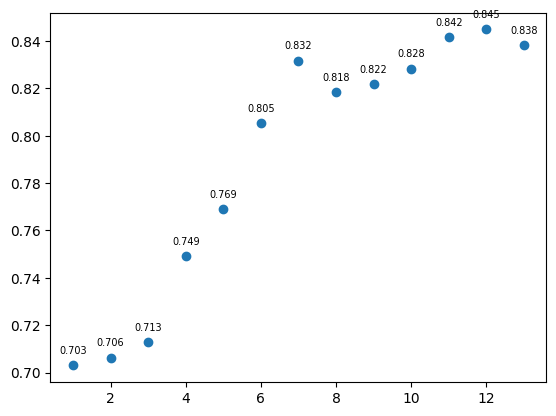

In [ ]:
import matplotlib.pyplot as plt

plt.plot(n_list, score,'o')

for a, b in zip(n_list, score):
    plt.text(a,b+0.005, '%.3f'%(b) ,ha='center',fontsize=7)

## 使用RFE來進行特徵排序

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
estimator = SVC(kernel="linear")
selector = RFE(estimator, n_features_to_select=1)
selector.fit(x,y)

print(selector.ranking_)
print(selector.feature_names_in_)

print("\n排序後:")
for i in selector.ranking_.argsort():
    print(selector.ranking_[i], '\t', selector.feature_names_in_[i])

[12  2  6 11 13  9  8 10  1  7  3  4  5]
['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal']

排序後:
1 	 exang
2 	 sex
3 	 slope
4 	 ca
5 	 thal
6 	 cp
7 	 oldpeak
8 	 restecg
9 	 fbs
10 	 thalach
11 	 trestbps
12 	 age
13 	 chol
